# Rechnung mit Dezibel

Bel

$$ x[B] = \log_{10}\left(\frac{P_1}{P_0}\right) $$

Dezibel

$$ x[dB] = 10\cdot\log_{10}\left(\frac{P_1}{P_0}\right) $$

Umrechnung ins lineare Verhältnis

$$ \frac{P_1}{P_0} =  10^{\frac{x[dB]}{10}} $$

Kehrwert des linearen Verhältnisses bedeutet Vorzeichenwechsel im Logrrithmischen 

$$ x[dB]=10\cdot\log_{10}\left(\frac{P_1}{P_0}\right)\rightarrow 10\cdot\log_{10}\left(\frac{P_0}{P_1}\right)=10\cdot\log_{10}\left(\left(\frac{P_1}{P_0}\right)^{-1}\right)=-10\cdot\log_{10}\left(\frac{P_1}{P_0}\right)=- x[dB] $$

Multiplikation im linearen bedeutet Addition im Logarithmischen

$$ \frac{P_1}{P_0}\cdot\frac{P_3}{P_2}= 10^{\frac{x [dB]}{10}} \cdot 10^{\frac{y [dB]}{10}}=10^{\frac{x + y[dB]}{10}}\\ $$

## Diese Werte müssen Sie sich merken

| dB|lineares Leistungsverhältnis   | Das müssen Sie sich merken   |
|---|---|---|
| 10|10,00 | 10  |
|  9| 7,94 |   |  
|  8| 6,31 |   |  
|  7| 5,01 |   |  
|  6| 3,98 |   |  
|  5| 3,16 | $\approx \pi$  |  
|  4| 2,51 |   |  
|  3| 1,99 | $\approx 2$  |  
|  2| 1,58 |   |  
|  1| 1,26 |  $\approx \frac{5}{4} = 1,25$ |  
|  0| 1,00 |  1 |  


| dB|lineares Leistungsverhältnis   | Das müssen Sie sich merken   |
|---|---|---|
| -1|0,79 | $\approx \frac{4}{5} = 0,8$  |
| -2| 0,63 |   |  
| -3| 0,5 |  $\approx \frac{1}{2}$ |  
| -4| 0,4 |   |  
| -5| 0,32 | $\approx 1/\pi$   |  
| -6| 0,25 | |  
| -7| 0,20 |   |  
| -8| 0,16 |  |  
| -9| 0,13 |   |  
| -10| 0,10 | $\frac{1}{10}$|  

## Absolute Leistungspegel

* Mit der Normierung auf einen Referenzleistungspegel kann man auch so auch absolute Leistungspegel beschreiben
* In der Telekommunikation wird die Referenzleistung häufig zu $P_0$= 1 mW gewählt, die logarithmische Einheit dazu heißt dBm

$$  x [dBm]=10\cdot\log_{10}\left(\frac{P_1}{1 mW}\right) $$

* Prinzipiell kann aber auch jede andere Referenzleistung benutzt werden

* Achtung: absolute Leistungspegel (in dB) können nicht einfach addiert werden!!
* 30 dBm + 30 dBm ≠ 60dBm !!!
* Sondern?

## Warum?

* In der Telekommunikation kommen häufig sowohl sehr große als auch sehr kleine Zahlenwerte vor
* Im Logarithmischen (dB) sind diese großen Bereiche einfacher zu handhaben
* Beispiel: Mobilfunkstation sendet mit ca. 80 W , am Handy kommen aber nur 0,000000002 W, also 0,0000000025% der Sendeleistung an. Im Logarithmischen sendet die Station mit ca. 49 dBm und das Handy empfängt noch -57 dBm, was einem Pegelunterschied von 106 dB entspricht

* Eine Kaskadierung von Verstärkern kann einfacher im Kopf berechnet werden
* Beispiel: zwei Verstärkter hintereinander, wobei diese jeweils eine Leistungsverstärkung von ca. 31 und 12,5 aufweisen.  Was einer Gesamtverstärkung von 387,5 entspricht.
* In dB kann das häufig einfacher auszudrücken und zu berechnen sein:
--> 3,1*10*10*1,25 --> ca. 5dB+10dB+10dB+1dB=26dB --> ca. 400


In [1]:
import numpy as np
import scipy.signal as ssignal 
import matplotlib.pyplot as plt
import sympy as sym

%config InlineBackend.figure_format = 'svg'

plt.style.use('noelle.mplstyle')
#plt.rcParams["figure.figsize"] = (4.0,2.5)

#inline, widget 
%matplotlib inline

f = np.arange(-5,5,0.01)
gw = ssignal.windows.gaussian(f.size,std=100)
si = np.abs(np.sinc(f))**2

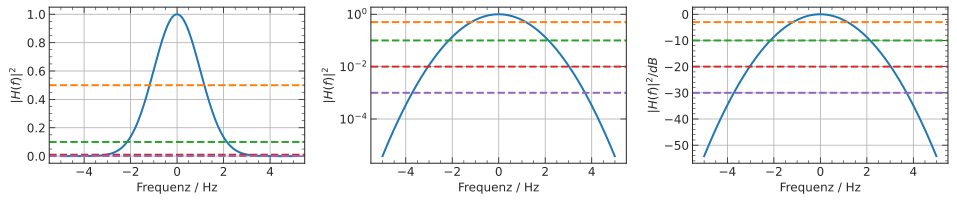

In [2]:
 # plotting
n_row = 1
n_col = 3
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col)

axs[0].plot(f, gw, 'C0')
axs[0].axhline(y=0.5, ls='--',c='C1')
axs[0].axhline(y=0.1, ls='--',c='C2')
axs[0].axhline(y=0.01, ls='--',c='C3')
axs[0].axhline(y=0.001, ls='--',c='C4')
axs[0].set(xlabel=r"Frequenz / Hz", ylabel=r"$|H(f)|^2$")

axs[1].semilogy(f, gw, 'C0')
axs[1].axhline(y=0.5, ls='--',c='C1')
axs[1].axhline(y=0.1, ls='--',c='C2')
axs[1].axhline(y=0.01, ls='--',c='C3')
axs[1].axhline(y=0.001, ls='--',c='C4')
axs[1].set(xlabel=r"Frequenz / Hz", ylabel=r"$|H(f)|^2$")

axs[2].plot(f, 10*np.log10(gw), 'C0')
axs[2].axhline(y=10*np.log10(0.5), ls='--',c='C1')
axs[2].axhline(y=10*np.log10(0.1), ls='--',c='C2')
axs[2].axhline(y=10*np.log10(0.01), ls='--',c='C3')
axs[2].axhline(y=10*np.log10(0.001), ls='--',c='C4')
axs[2].set(xlabel=r"Frequenz / Hz",ylabel=r"$|H(f)|^2 / dB$")

fig.tight_layout()
plt.show()

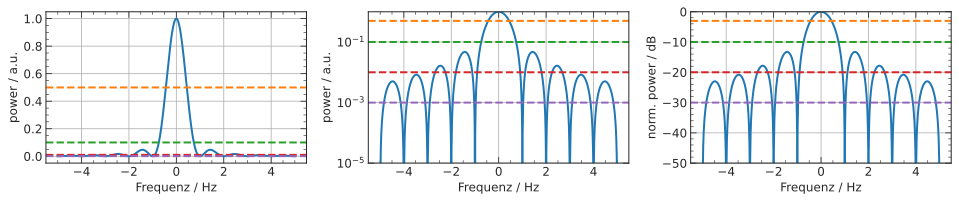

In [3]:
 # plotting
n_row = 1
n_col = 3
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col)

axs[0].plot(f, si, 'C0')
axs[0].axhline(y=0.5, ls='--',c='C1')
axs[0].axhline(y=0.1, ls='--',c='C2')
axs[0].axhline(y=0.01, ls='--',c='C3')
axs[0].axhline(y=0.001, ls='--',c='C4')
axs[0].set(xlabel=r"Frequenz / Hz", ylabel="power / a.u.")

axs[1].semilogy(f, si, 'C0')
axs[1].axhline(y=0.5, ls='--',c='C1')
axs[1].axhline(y=0.1, ls='--',c='C2')
axs[1].axhline(y=0.01, ls='--',c='C3')
axs[1].axhline(y=0.001, ls='--',c='C4')
axs[1].set(xlabel=r"Frequenz / Hz", ylabel="power / a.u.", ylim=(1e-5, 1))

axs[2].plot(f, 10*np.log10(si), 'C0')
axs[2].axhline(y=10*np.log10(0.5), ls='--',c='C1')
axs[2].axhline(y=10*np.log10(0.1), ls='--',c='C2')
axs[2].axhline(y=10*np.log10(0.01), ls='--',c='C3')
axs[2].axhline(y=10*np.log10(0.001), ls='--',c='C4')
axs[2].set(xlabel=r"Frequenz / Hz", ylabel="norm. power / dB",  ylim=(-50, 0))

fig.tight_layout()
plt.show()